# I Solving the Sum of Two Digits Programming Challenge

## C++

In [1]:
%%writefile APlusB.cpp
#include <iostream>
using namespace std;

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    cin >> a;
    cin >> b;
    cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [2]:
!g++ APlusB.cpp -o APlusB
!./APlusB

2
4
6

### Test input output files

In [73]:
%%writefile input1.txt
4 8

Overwriting input1.txt


In [74]:
%%writefile output1.txt
12

Overwriting output1.txt


In [75]:
%%writefile input2.txt
-5 9

Overwriting input2.txt


In [76]:
%%writefile output2.txt
4

Overwriting output2.txt


In [77]:
!./APlusB < input1.txt

12

In [78]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [9]:
!grep -xvFf output1.txt output1.txt 

In [10]:
!grep -xvFf output1.txt output2.txt 

7


In [11]:
!grep -xvFf output2.txt output1.txt 

26


In [12]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [13]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

-5


## Python

In [14]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [15]:
!python sum.py

4 6
10


In [16]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [17]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

-5


# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [18]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;

int MaxPairwiseProduct(const vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = max(max_product, numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    cin >> n;
    vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        cin >> numbers[i];
    }

    cout << "\n" << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [19]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

6
23 1 89 56 34 5

4984


### Test 1: Small numbers

In [20]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [21]:
!./max_pairwise_product < input1.txt


90


### Test 2: largest input numbers 200000 200000 in the input

In [22]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [23]:
!./max_pairwise_product < input2.txt


1345294336


Changing the variables to long long

In [24]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;

long long MaxPairwiseProduct(const vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    cin >> n;
    vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        cin >> numbers[i];
    }

    cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [25]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [26]:
%%writefile max_pairwise_product_long_test3.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <climits>
using namespace std;

long long MaxPairwiseProduct(const vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    srand(time(NULL));
    
    for(int i = 0; i < 20; i++){
      int n = rand() % 19 + 2;
      vector<int> nums(n);

      for(int j = 0; j < n; j++){
        nums[j] = rand() % LLONG_MAX + 1;
      }

      cout << "Test " << i << ": ";
      for(int j = 0; j < n; j++){
        cout << nums[j] << " ";
      }

      cout << "\n" << "Maximum pairwise product is: " << MaxPairwiseProduct(nums) << endl;

    }
    return 0;
}

Writing max_pairwise_product_long_test3.cpp


In [27]:
!g++ max_pairwise_product_long_test3.cpp -o max_pairwise_product_long_test3
!./max_pairwise_product_long_test3

Test 0: 306205571 857664593 
Maximum pairwise product is: 262621676426047603
Test 1: 1067515743 1146574761 864553476 
Maximum pairwise product is: 1223986607893962423
Test 2: 1432435785 1726861411 723959102 313496466 1619505682 2074304119 1644250831 1847457565 267967947 1026899126 141058419 1690625105 2021002842 1222845285 
Maximum pairwise product is: 4192174519671306198
Test 3: 449834480 1026746445 2027764429 2069250680 1796984823 1687093130 1549207592 1966250482 1357998383 1855413162 676431426 261293947 775445256 
Maximum pairwise product is: 4195952923588061720
Test 4: 1125847422 1036872938 1107958322 705225184 1760832039 1421454788 177247217 1687652510 918221970 2024704781 1955620456 1945121095 18279551 1498761912 1818640288 1241124835 1015803086 120991119 120387632 896083866 
Maximum pairwise product is: 3959554087084600136
Test 5: 1917372454 435693347 1591965742 1736139287 1793691729 1299895256 265087064 2054985675 2075340511 2088093249 1033349448 964729800 1048567923 1738574631

### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [28]:
%%writefile Test2Write.cpp
#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [29]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [30]:
%%writefile input3.txt
5
764543 8734578453 78347834 3432984 8387832

Overwriting input3.txt


In [31]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

1641843589928321

real	0m0.002s
user	0m0.002s
sys	0m0.000s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [32]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;

int main() {                                                               
    int n = 10;                                                                                                                            //1
    vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        cout << numbers[i];                                             
    }

    cout << "\n";                       
    return 0;                                                              
}  

Writing test_init_vectors.cpp


In [33]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [34]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;

long long MaxPairwiseProduct(const vector<int>& numbers) {                   
    long long max_product = 0LL;                                                                                 
	  long long aux_product = 0LL;                                              
    int n = numbers.size();                                                   
                                                                             
    for (int first = 0; first < n; ++first) {                                
        for (int second = first + 1; second < n; ++second) {                 
			       aux_product =  (long long) numbers[first] * numbers[second];    
            if (max_product < aux_product)  {                               
				        max_product = aux_product;                                   
             }
        }
    }
                                                                            
    return max_product;                                                    
}

int main() {                                              
    int n;                                               
    cin >> n;                                             
    vector<int> numbers(n);                               
    for (int i = 0; i < n; ++i) {                       
        cin >> numbers[i];                                
    }

    cout << MaxPairwiseProduct(numbers) << "\n";    
    return 0;                                           
}                                                      


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [35]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;

long long MaxPairwiseProduct(const vector<long long>& numbers, long long &execints) {            
    long long m = 0LL;                                                      
    long long max_product = 0LL;                                             
    execints++;

	  long long aux_product = 0LL;                                             
    execints++;

    int n = numbers.size();                                                 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                               
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               
                       
				        max_product = aux_product;                                   
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) cout << m << "\n";
    }
                                                                            
    return max_product;                                                    
}

int main() {                                               
    long long execints = 0LL;

    int n;                                                  
    execints++;                                                              
    
    cin >> n;                                              
    execints++;

    vector<long long> numbers(n);                           
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            
        execints += 2;

        cin >> numbers[i];
        execints++;                                         
    }
    
    //cout << MaxPairwiseProduct(numbers) << "\n";          

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    cout <<  execints << "\n";                       
    return 0;                                                
}                                                            

Writing max_pairwise_product_long_execints.cpp


In [36]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
1
1
0
0
0
86


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [37]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [38]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of instruction that are executed in that line

In [39]:
%%writefile maximum_pairwise_product_Efficient.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;

int EfficientMaximumPairwiseProduct(int n, vector<long long> nums){
    int maxn = 0;                                                               
    int smaxn = 0;                                                              
    for(int i = 0; i < n; i++){                                                 
      if(nums[i] > maxn){                                                       
        smaxn = maxn;                                                           
        maxn = nums[i];                                                         
      }else if(nums[i] > smaxn){                                                
        smaxn = nums[i];                                                        
      }
    }
    return smaxn*maxn;                                                          
}                                                                               

int main () {
    int n;
    cin >> n;
    vector<long long> nums(n);
    for(int i = 0; i < n; i++){
        cin >> nums[i];
    }

    cout << "Maximum pairwise product is: " << EfficientMaximumPairwiseProduct(n, nums) << endl;
}

Writing maximum_pairwise_product_Efficient.cpp


Test with inputs 1 and 2



In [40]:
!g++ maximum_pairwise_product_Efficient.cpp -o maximum_pairwise_product_Efficient
!time ./maximum_pairwise_product_Efficient < input1.txt

!g++ maximum_pairwise_product_Efficient.cpp -o maximum_pairwise_product_Efficient
!time ./maximum_pairwise_product_Efficient < input2.txt
     

Maximum pairwise product is: 90

real	0m0.003s
user	0m0.001s
sys	0m0.001s
Maximum pairwise product is: 1345294336

real	0m0.002s
user	0m0.000s
sys	0m0.002s


Test and time it with input 3

In [42]:
!g++ maximum_pairwise_product_Efficient.cpp -o maximum_pairwise_product_Efficient
!time ./maximum_pairwise_product_Efficient < input3.txt

Maximum pairwise product is: 7246018

real	0m0.002s
user	0m0.002s
sys	0m0.000s


**20 stress tests**

In [43]:
%%writefile maximum_pairwise_product_Efficient_stress.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <climits>
using namespace std;

int EfficientMaximumPairwiseProduct(int n, vector<long long> nums){
    int maxn = 0;                                                               
    int smaxn = 0;                                                              
    for(int i = 0; i < n; i++){                                                 
      if(nums[i] > maxn){                                                       
        smaxn = maxn;                                                           
        maxn = nums[i];                                                         
      }else if(nums[i] > smaxn){                                                
        smaxn = nums[i];                                                        
      }
    }
    return smaxn*maxn;                                                          
}                                                                               

int main() {
    srand(time(NULL));

    for(int i = 0; i < 20; i++){
      int n = rand() % 19 + 2;
      vector<long long> nums(n);

      for(int j = 0; j < n; j++){
        nums[j] = rand() % LLONG_MAX + 1;
      }

      cout << "Test " << i << ": ";
      for(int j = 0; j < n; j++){
        cout << nums[j] << " ";
      }

      cout << "\n" << "Maximum pairwise product is: " << EfficientMaximumPairwiseProduct(n, nums) << endl;

    }
    return 0;
}

Writing maximum_pairwise_product_Efficient_stress.cpp


In [44]:
!g++ maximum_pairwise_product_Efficient_stress.cpp -o maximum_pairwise_product_Efficient_stress
!time ./maximum_pairwise_product_Efficient_stress

Test 0: 744376921 103706370 891611760 1792427319 292599912 755868434 1939624882 1103997290 
Maximum pairwise product is: -1544489666
Test 1: 1412224175 674746116 1236589920 
Maximum pairwise product is: -1233726304
Test 2: 1533824349 2090922517 266020723 496611784 
Maximum pairwise product is: 1193558689
Test 3: 2036888075 1459056939 1356710733 2106638039 313446215 1644093621 852462534 1868685607 601119871 1038171356 273837349 1919796022 285004956 1018214270 2023502391 1176616715 663157940 
Maximum pairwise product is: 9171261
Test 4: 1932485148 455299174 1272615943 2036647576 1867523348 1947362059 1125753847 48105007 1333702759 1069192716 314125729 1830314543 1968864714 203530155 1141887833 1178091798 162684545 1455334047 674701771 1015147079 
Maximum pairwise product is: 1206709232
Test 5: 1275821641 2053318434 1450373353 1048134015 190839741 321103974 924152757 1367456455 984261914 1092771411 1152457954 1439561087 217903705 
Maximum pairwise product is: 840072690
Test 6: 1159600786 

Count executed instructions in code and verify with inputs 1,2 and 3


In [45]:
%%writefile maximum_pairwise_product_exec_Efficient.cpp
#include <iostream>
#include <vector>
#include <algorithm>
using namespace std;

int EfficientMaximumPairwiseProduct(int n, vector<long long> nums){
    int maxn = 0;                                                               
    int smaxn = 0;                                                              
    for(int i = 0; i < n; i++){                                                 
      if(nums[i] > maxn){                                                       
        smaxn = maxn;                                                           
        maxn = nums[i];                                                         
      }else if(nums[i] > smaxn){                                                
        smaxn = nums[i];                                                        
      }
    }
    return smaxn*maxn;                                                          
}                                                                               

int main () {
    int n;
    cin >> n;
    vector<long long> nums(n);
    for(int i = 0; i < n; i++){
        cin >> nums[i];
    }

    cout << "\n" << "Instruction number: " << 6*n+3 << endl;
    cout << "Maximum pairwise product is: " << EfficientMaximumPairwiseProduct(n, nums) << endl;
}

Writing maximum_pairwise_product_exec_Efficient.cpp


In [46]:
!g++ maximum_pairwise_product_exec_Efficient.cpp -o maximum_pairwise_product_exec_Efficient
!time ./maximum_pairwise_product_exec_Efficient < input1.txt

!g++ maximum_pairwise_product_exec_Efficient.cpp -o maximum_pairwise_product_exec_Efficient
!time ./maximum_pairwise_product_exec_Efficient < input2.txt

!g++ maximum_pairwise_product_exec_Efficient.cpp -o maximum_pairwise_product_exec_Efficient
!time ./maximum_pairwise_product_exec_Efficient < input3.txt


Instruction number: 63
Maximum pairwise product is: 90

real	0m0.001s
user	0m0.001s
sys	0m0.000s

Instruction number: 39
Maximum pairwise product is: 1345294336

real	0m0.001s
user	0m0.001s
sys	0m0.000s

Instruction number: 33
Maximum pairwise product is: 7246018

real	0m0.001s
user	0m0.000s
sys	0m0.001s


Calculate estimated time by instruction and number of instructions by second

In [48]:
0.0064/2800013


2.285703673518659e-09

In [49]:
1/(0.0064/2800013)

437502031.24999994

### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [51]:
%%writefile max_pairwise_product_superE.cpp
#include <iostream>

int main() {
    int n;                                            
    std::cin >> n;                                    

    long long max1 = -1, max2 = -1;                         
    for (int i = 0; i < n; ++i) {                     
        long long num;                                
        std::cin >> num;                              

        if (num > max1) {                             
            max2 = max1;                              
            max1 = num;                               
        } else if (num > max2) {                       
            max2 = num;                               
        }
    }

    long long max_product = max1 * max2;               
    std::cout << max_product << std::endl;             

    return 0;
}


Writing max_pairwise_product_superE.cpp


Test with inputs 1 and 2


 

In [52]:
!g++ max_pairwise_product_superE.cpp -o max_pairwise_product_superE
!./max_pairwise_product_superE < input1.txt
!./max_pairwise_product_superE < input2.txt

90
40000000000


Test and time it with input 3

In [53]:
!time ./max_pairwise_product_superE < input3.txt

684335302695620802

real	0m0.004s
user	0m0.001s
sys	0m0.001s


20 stress tests 

In [55]:
%%writefile stress_test_superE.cpp
#include <iostream>
#include <cstdlib>
#include <ctime>
#include <vector>

long long max_pairwise_product(int n, const std::vector<long long>& numbers) {
    long long max1 = -1, max2 = -1;
    for (int i = 0; i < n; ++i) {
        long long num = numbers[i];

        if (num > max1) {
            max2 = max1;
            max1 = num;
        } else if (num > max2) {
            max2 = num;
        }
    }

    return max1 * max2;
}

int main() {
    const int num_tests = 20;
    const int max_n = 11;
    const long long max_element = 100;

    std::srand(std::time(0));

    for (int test = 1; test <= num_tests; ++test) {
        int n = std::rand() % max_n + 1;
        std::vector<long long> numbers(n);

        for (int i = 0; i < n; ++i) {
            numbers[i] = std::rand() % max_element;
        }

        long long max_product = max_pairwise_product(n, numbers);
        std::cout << "Test " << test << ": Max pairwise product = " << max_product << std::endl;
    }

    return 0;
}


Writing stress_test_superE.cpp


In [56]:
!g++ stress_test_superE.cpp -o stress_test_superE
!./stress_test_superE

Test 1: Max pairwise product = 3819
Test 2: Max pairwise product = 5183
Test 3: Max pairwise product = 957
Test 4: Max pairwise product = 7544
Test 5: Max pairwise product = 4950
Test 6: Max pairwise product = 8645
Test 7: Max pairwise product = 6960
Test 8: Max pairwise product = 4784
Test 9: Max pairwise product = 7569
Test 10: Max pairwise product = -83
Test 11: Max pairwise product = -44
Test 12: Max pairwise product = 2907
Test 13: Max pairwise product = 5576
Test 14: Max pairwise product = 6612
Test 15: Max pairwise product = 7482
Test 16: Max pairwise product = 9603
Test 17: Max pairwise product = 5589
Test 18: Max pairwise product = 6534
Test 19: Max pairwise product = 6016
Test 20: Max pairwise product = 8730


Count executed instructions in code and verify with inputs 1,2 and 3

In [57]:
%%writefile max_pairwise_product_superE.cpp
#include <iostream>

int main() {
    long long execints=0LL;
    int n;                                            
    execints++;
    std::cin >> n;                                    
    execints++;

    long long max1 = -1, max2 = -1;                      
    execints+=2;       
    execints++;
    for (int i = 0; i < n; ++i) {                     
        execints+=2;
        long long num;                                
        execints++;
        std::cin >> num;                              
        execints++;
        execints++;
        if (num > max1) {                             
            execints++;
            max2 = max1;                              
            execints++;
            max1 = num;                               
            execints++;
        } else if (num > max2) {                      
            execints++;
            max2 = num;                               
        }
    }

    long long max_product = max1 * max2;               
    execints++;
    std::cout << max_product << std::endl;             
    execints+=2;
    std::cout << "instructions executed: " << execints << "\n";

    return 0;
}

Overwriting max_pairwise_product_superE.cpp


In [58]:
!g++ max_pairwise_product_superE.cpp -o max_pairwise_product_superE
!./max_pairwise_product_superE < input1.txt
!./max_pairwise_product_superE < input2.txt
!./max_pairwise_product_superE < input3.txt

90
instructions executed: 88
40000000000
instructions executed: 49
684335302695620802
instructions executed: 40


Calculate estimated time by instruction and number of instructions by second

In [59]:
!time ./max_pairwise_product_superE < input3.txt

684335302695620802
instructions executed: 40

real	0m0.002s
user	0m0.001s
sys	0m0.001s


# Codeforces problem https://codeforces.com/contest/1619/problem/A 

Solve the problem in Colab, submit the solution to Codeforces and add a screenshoot of the submission.

In [60]:
%%writefile is.cpp
#include <iostream>
#include <string>

bool is(const std::string& s) {
    int x = s.length();
    if (x % 2 != 0) {
        return false;
    }

    int raiz = x / 2;
    for (int i = 0; i < raiz; ++i) {
        if (s[i] != s[raiz + i]) {
            return false;
        }
    }

    return true;
}

int main() {
    int aux;
    std::cin >> aux;

    for (int i = 0; i < aux; ++i) {
        std::string s;
        std::cin >> s;

        if (is(s)) {
            std::cout << "YES" << std::endl;
        } else {
            std::cout << "NO" << std::endl;
        }
    }

    return 0;
}


Writing is.cpp


In [61]:

%%writefile tests.txt
10
a
aa
aaa
aaaa
abab
abcabc
abacaba
xxyy
xyyx
xyxy

Writing tests.txt


In [62]:
!g++ is.cpp -o is
!./is < tests.txt

NO
YES
NO
YES
YES
YES
NO
NO
NO
YES


In [63]:
!g++ -v

Using built-in specs.
COLLECT_GCC=g++
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/9/lto-wrapper
OFFLOAD_TARGET_NAMES=nvptx-none:hsa
OFFLOAD_TARGET_DEFAULT=1
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 9.4.0-1ubuntu1~20.04.1' --with-bugurl=file:///usr/share/doc/gcc-9/README.Bugs --enable-languages=c,ada,c++,go,brig,d,fortran,objc,obj-c++,gm2 --prefix=/usr --with-gcc-major-version-only --program-suffix=-9 --program-prefix=x86_64-linux-gnu- --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx-abi=new --enable-gnu-unique-object --disable-vtable-verify --enable-plugin --enable-default-pie --with-system-zlib --with-target-system-zlib=auto --enable-objc-gc=auto --enable-multiarch --disable-werror --with-arch-32=i686 --with-abi=m64 --with-multilib-list=m32,m

**Solution Codeforces Is_squrt**

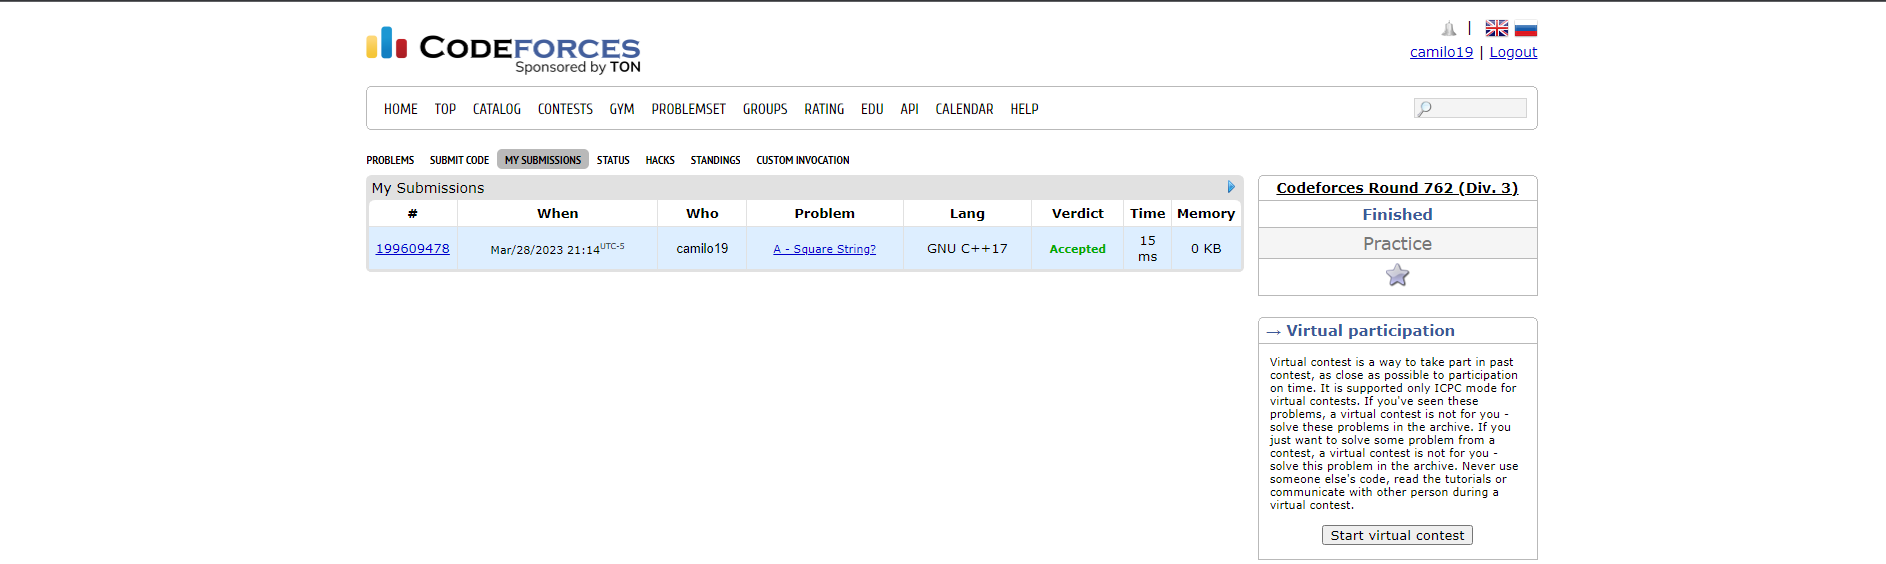

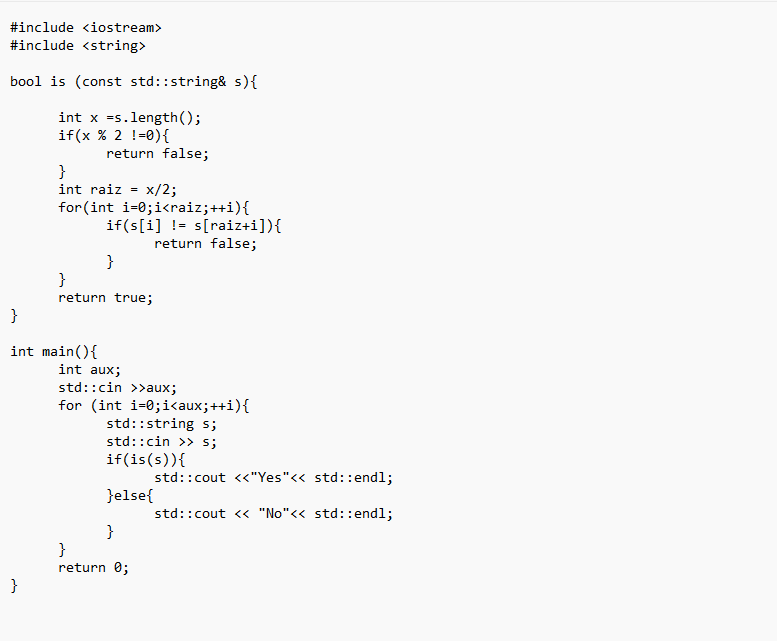